<div dir=rtl>
    
## מעבדה לפיסיקה 2

<h1><center>מיפוי שדה חשמלי</center></h1>

<div dir=rtl>
תיעוד ניסוי "מיפוי שדה חשמלי"<br>
0.5.1
    
***
<div dir=rtl>
תאריך: 12/05/2025
    
<div dir=rtl> 
עמדה: 18
<div dir=rtl>
מבצעים/ות: איתמר בנדור, דן קצוב-פייגין



***
<div dir=rtl> 
<b> הערות: </b> <br>
.... <br>
....

<br> <br>
<div dir=rtl>
<b>פתרון בשיטת הדמויות עבור תיל ומשטח מוארק:</b>
<div dir=rtl>
עבור קונפיגורציה של משטח מוארק ותיל טעון (לדוגמא, קונפיגורציה 6), הפתרון בשיטת הדמויות עבור חתך דו מימדי זהה לתפרון עבור מטען נקודתי ומשטח מוארק, קרי:
$ q'=-q ~ , ~ d' = -d $ 

<br> <br>
<div dir=rtl>
<b>פתרון בשיטת הדמויות עבור תיל וגליל מוארק:</b>
<div dir=rtl>
עבור קונפיגורציה של גליל מוארק ותיל טעון (לדוגמא, קונפיגורציה 2), הפתרון בשיטת הדמויות עבור משטח דו מימדי הוא מהצורה הבאה:
    
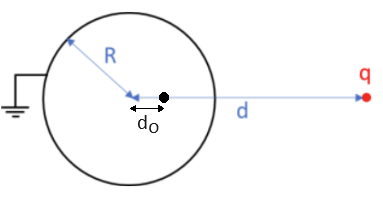
<div dir=rtl>
    כשמטען הדמות הוא:
$ q'=-q $ 
    ומיקומו מקיים:
$ R^2 = d_0 d $


<div dir=rtl> 
רעיונות לקונפיגורציות מוכרות לבחור מהן:
<div dir=rtl> 
(כאלה שאפשר לבנות את פתרון מטעני הדמות שלהן על בסיס מה שראינו בהרצאות\תרגולים\מבחני עבר)
    
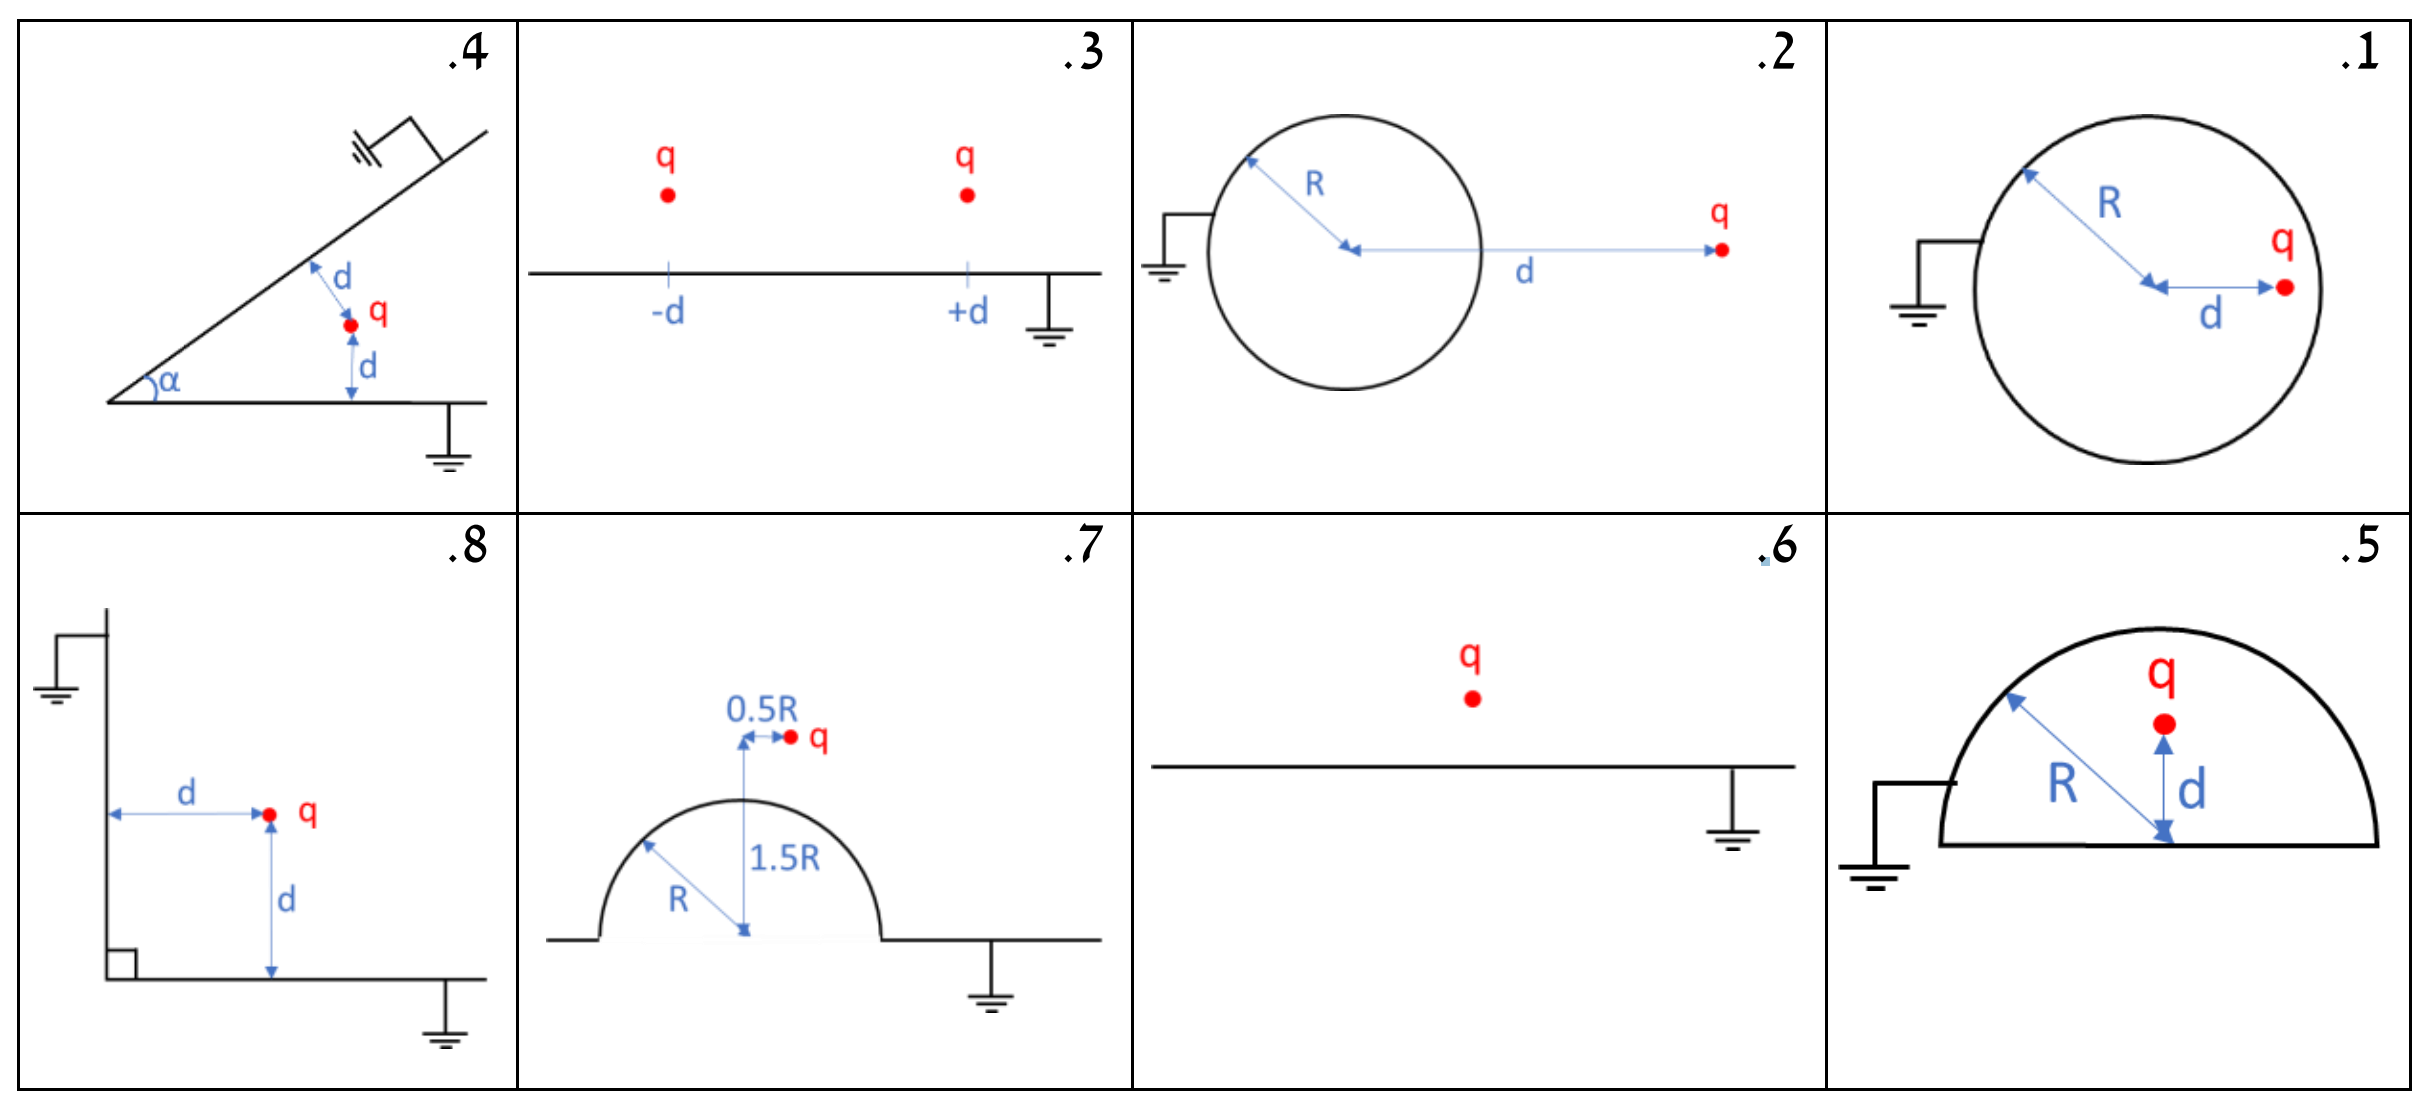

<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [3]:
import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.stats import linregress  # linear regression

<div dir=rtl>
    
#### הגדרת פונקציות עזר (לשרטוט קווי הפוטנציאל):

<div dir=rtl>
הפונקציה הבאה נועדה להקל על שרטוט הפוטנציאל של התפלגויות מטען בדידות. <br>
אופן השימוש במחלקה מודגם עבור הקונפיגורציה של לוח מוארק בחלק 4ב.

In [64]:
class space:
    charges = []  # list for all point charges, both real and mirror

    # this built-in procedure initiate properties of new point element
    # double underscore at name __init__ means that this is reserved name.
    # 'self' is a reserved name for the object itself
    # x, y are coordinates
    # q is charge value. When q is zero, this object is just a point in space.
    # label is explanatory text.
    def __init__(self, x, y, q=0, label=''):
        if q != 0:  # we keep list of charges
            space.charges.append(self)
        self.x = x
        self.y = y
        self.q = q
        self.label = label

    # calculating Euclidean distance between this point (called 'self')
    # and some other point, called 'other'
    def distance(self, other):
        r = np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
        return r

    # calc potential of this charge, called 'self'
    # at some arbitrary point in space, called 'other'
    def potential(self, other):
        r = self.distance(other)
        phi = self.q * np.log(r)
        return phi

    # class methods work with all population of the class.
    # it is convenient to use class method to make superposition,
    # to visualize equipotential lines etc.

    @classmethod
    # potential superposition from all charges at arbitrary point
    def potential_sum(cls, at_point):
        phi = 0
        for charge in cls.charges:
            phi += charge.potential(at_point)
        return phi

    @classmethod
    # delete all charges
    def cleanup(cls):
        for charge in cls.charges:
            cls.charges.remove(charge)
        cls.charges = []

    @classmethod
    # visualization of potential fields is also nice way to use class method
    # draw equipotential lines with this voltages and C, C0 found experimentally
    def plot_potential(cls, C, C0, voltages=[0, 2, 5, 10]):
        # paper size (Lx, Ly)
        Lx, Ly = 28, 20  #cm

        N = 100  # meshgrid density
        x_space = np.linspace(0, Lx, N)  # defines coordinates
        y_space = np.linspace(0, Ly, N)  # defines coordinates
        coord_x, coord_y = np.meshgrid(x_space, y_space)
        M_xy = space(coord_x, coord_y)

        # potential
        V_xy = C * space.potential_sum(M_xy) + C0

        plt.figure()
        contours = plt.contour(coord_x, coord_y, V_xy, levels=voltages, colors='green')  # draw countour lines
        plt.clabel(contours, inline=True)  # label countour line with its value

        # plot charges as a small red circle
        for charge in space.charges:
            if (0 <= charge.x <= Lx) and (0 <= charge.y <= Ly):
                if charge.q > 0:
                    color = 'red'
                else:
                    color = 'blue'
                plt.plot(charge.x, charge.y, marker="o", markersize=10, markerfacecolor=color)
                plt.gca().annotate(charge.label, xy=(charge.x, charge.y),
                                   xytext=(10, -10), textcoords='offset pixels')

        # plt.xlabel('x [cm]')
        plt.xticks(range(0, Lx + 1, 2))
        # plt.ylabel('y [cm]')
        plt.yticks(range(0, Ly + 1, 2))
        plt.grid()
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')

        resolution = 300
        coord_x, coord_y = np.meshgrid(np.linspace(0, 28, resolution), np.linspace(0, 20, resolution))


        def p(x, y):
            color_map = np.zeros((len(x),len(y)))
            for i in range(len(x)):
                for j in range(len(y)):
                    q = space(x=x[0][i], y=y[j][0], q=0, label='test')
                    color_map[j][i] = Q1.potential(q) + Q2.potential(q)
            return color_map

        plt.pcolormesh(coord_x, coord_y, p(coord_x, coord_y), cmap='jet_r')
        # plt.title('Potential field - theoretical')
        plt.show()  # displays the figure


<div dir=rtl> 

<h1>
    מהלך הניסוי 
<a id="hathala"></a>
</h1>

<div dir=rtl> 

## בחירת קונפיגורציה א'

<a id='ConfA'></a>

<br>
תיעוד בחירה: <br>
בשביל התחלה, נבחר בתצורה הפשוטה של לוח מוליך

<img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_MP/configurations.png" width="600">

<div dir=rtl>     
    
### 3. חיבור המערכת, תיעוד:
    .
    .
    .
    .

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> חשבו מראש איפה כדאי למקם את האלקטרודות בשביל לאפשר מדידה מרווחת
</div>

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם מתקבלים המתחים הצפויים בקרבת האלקטרודות?
</div>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה צפויה להיות ההשפעה של חיבור מוליך ללא חיבור פעיל? (מוליך שאיננו אלקטרודה)
</div>

<div dir=rtl> 

### 4. מדידה איכותית של קווים שווי פוטנציאל:

<div dir=rtl> 

#### 4א. חישוב פוטנציאל:

<div dir=rtl>

#### פוטנציאל עבור קונפיגורציה 6:
    
$$
\begin{align}
\varphi &= \varphi_1(r_1) + \varphi_2(r_2) \\
        &= C \left[q \ln\left(r_1\right) + q \ln\left(r_2\right)\right] + C0
\end{align}
$$

<div dir=rtl> 
    
#### 4ב. גרף של קווים שווי פוטנציאל:

<div dir=rtl>
    
##### מיקום מטענים

In [66]:
space.cleanup()  # הסרת מטענים קודמים שהושמו באמצעות הפונקציה
# מיקום (ומטען) "מטען" אמיתי
Q1 = space(x=14, y=15, q=20, label='q')
# מיקום (ומטען) "מטען" דמות
Q2 = space(x=14, y=5, q=-20, label='-q')

<div dir=rtl>
    
##### שרטוט קווי הפוטנציאל עם הפונקציה המסופקת

<div dir=rtl>
נרמה ונשתמש בערכי ההתאמה שנבצע רק בסעיף 5 (המדידה הכמותית):

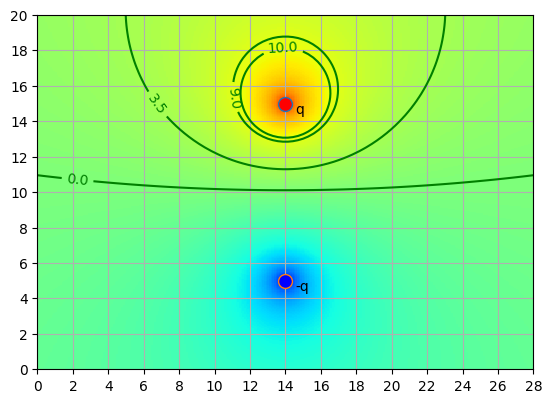

In [67]:
# The values for C=-0.23 and C0=0.02 are from the fit done later!
space.plot_potential(C=-0.36, C0=-0.31, voltages=[0, 3.5, 9, 10])

#### 4ג. קווים שווי פוטנציאל:

פה יש להשוות מול הקונפיגורציה והסימנים שלכם

<img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_MP/result_photo.jpg" width="600">

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> האם המדידות והגרף התיאורטי שלנו תואמים? איכותית? כמותית?
</div>

<div dir=rtl> 

### 5. מדידה כמותית של הפוטנציאל (לאורך ציר הסימטריה):

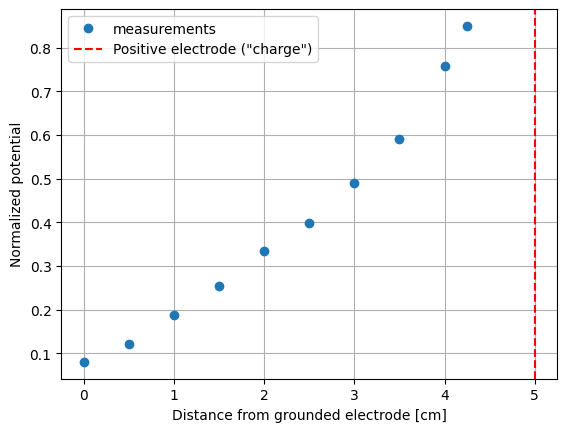

In [74]:
# Measuring the y-coordinate (left) and measured voltage (right) pairs:
measurements = np.array([
    [10, 1.6],
    [10.5, 2.406],
    [11, 3.766],
    [11.5, 5.072],
    [12, 6.69],
    [12.5, 7.961],
    [13, 9.8],
    [13.5, 11.82],
    [14, 15.15],
    [14.25, 16.99],
])
y, vdata = measurements.T  # apply .T to transpose and read the data by columns rather than rows
# Moving the measurements to be in relation to the grounded electrode (distance from negative electrode)
y -= 10
y_err = y * 1.1
vdata_err = vdata * (0.015 / 100) + 10 * 0.005

# Normalizing the measured voltage to be a unitless potential:
Vmax = 20
phi = vdata / Vmax
phi_err = vdata_err / Vmax

# Plotting:
plt.figure()
plt.plot(y, phi, 'o', label='measurements')
plt.grid()
plt.xlabel('Distance from grounded electrode [cm]')
plt.ylabel('Normalized potential')

# Adding a line indicating the location of the positive electrode ("charge"):
a = 5  #cm
plt.axvline(a, color='red', linestyle='--', label='Positive electrode ("charge")')

# Adding a legend to the figure:
plt.legend()

plt.show()

<div dir=rtl>

#### פוטנציאל לאורך ציר הסימטריה $y$ עבור קונפיגורציה 6:
    
<div dir=rtl>
(כלומר, לאורך  x=0 - בהינתן ומיקמנו את המטען שלנו מעל הראשית)
<br><br>
    
   
$$
\begin{align}
\varphi(0, y) &= \varphi_1(0, y) + \varphi_2(0, y)\\
              &= C q \ln\left(\sqrt{0^2+(y-a)^2}\right) - C q \ln\left(\sqrt{0^2+(y+a)^2}\right) + C0\\
              &= C q \ln\left(\left|y-a\right|\right) - C q \ln\left(\left|y+a\right|\right) + C0\\
              &= C q \ln\frac{\left|y-a\right|}{\left|y+a\right|} + C0
\end{align}
$$

<div dir=rtl> 
    
#### ביצוע רגרסיה ליניארית (על סמך הקשר של פוטנציאל לאורך ציר הסימטריה עבור קונפיגורציה 6):

In [2]:
# נבצע ליניאריזציה למשוואה של הפוטנציאל כדי שנוכל לבצע רגרסיה ליניארית
lnr = np.log(abs(y - a)) - np.log(abs(y + a))  #כל החלק שתלוי במרחק
lnr_err = (1 / abs(y - a) - 1 / abs(y + a)) * 0.1
# נצייר את הפוטנציאל כתלות ב"חלק שתלוי במרחק"
plt.plot(lnr, phi, 'o', label='Measurements')

plt.xlabel(r'Relative distance $\ln\frac{a-y}{a+y}$ ')
plt.ylabel('Relative potential')
plt.errorbar(lnr, phi, xerr=lnr_err, yerr=phi_err, linestyle='', ecolor='#39FF14')
plt.grid()
# TODO: INTERCEPT!!!
# נבצע רגרסיה ליניארית
fit = linregress(lnr, phi)
# ונוסיף גם אותה לגרף
C = round(fit.slope, 3)
C_err = round(fit.stderr, 3)
C0 = round(fit.intercept, 3)
C0_err = round(fit.intercept_stderr, 3)

lin = np.linspace(min(lnr) * 1.3, 0, 200)
plt.plot(lin, C * lin + C0, '-', linewidth=2, color='darkviolet', alpha=0.7,
         label=fr"$\phi_\mathrm{{normalized}} = ({C}\pm{C_err})\cdot\ln\frac{{a-y}}{{a+y}} + ({C0}\pm{C0_err})$",
         zorder=1)

plt.annotate(
    fr'Intercept = $({C0}\pm{C0_err})$',
    xy=(0, C0),
    xytext=(-1.3, C0 + 0.5),
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=-0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)

plt.legend()
plt.show()
C, C0

NameError: name 'y' is not defined

<div dir=rtl> 
    
#### שרטוט עקום הפוטנציאל עם הפרמטר $C=fit.slope$ שנמצא ברגרסיה הליניארית

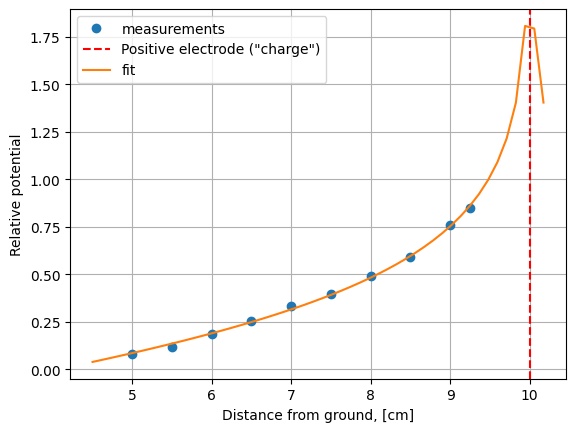

In [13]:
plt.plot(y, phi, 'o', label='measurements')
plt.xlabel('Distance from ground [cm]')
plt.ylabel('Relative potential')
plt.axvline(a, color='red', linestyle='--', label='Positive electrode ("charge")')

y_line = np.linspace(0.9 * np.min(y), 1.1 * np.max(y))
plt.plot(y_line, C * (np.log(abs(y_line - a)) - np.log(abs(y_line + a))) + C0, label='fit')
plt.grid()

plt.legend()

plt.show()

<div dir=rtl> 
    
#### 6. קווי שדה חשמלי:

<img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_MP/result_photo.jpg" width="600">

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> האם קווי השדה החשמלי שלנו מאונכים לקווים שווי הפוטנציאל?
</div>

[חזרה לתחילת קונפיגורציה א](#ConfA)

<div dir=rtl> 
<h2>
    בחירת קונפיגורציה ב'
<a id="confB"></a>
</h2>

<br>
תיעוד בחירה: <br>
.

.

.

<div dir=rtl> 

### 3. חיבור המערכת, תיעוד:
    .
    .
    .
    .

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> חשבו מראש איפה כדאי למקם את האלקטרודות בשביל לאפשר מדידה מרווחת
</div>

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם מתקבלים המתחים הצפויים בקרבת האלקטרודות?
</div>

<div dir=rtl> 
    
### 4. מדידה איכותית של קווים שווי פוטנציאל:

<div dir=rtl> 
    
####  4א. חישוב פוטנציאל:

<div dir=rtl>

#### פוטנציאל עבור קונפיגורציה \#:
    
$$
\begin{align}
\varphi &=  \\
        &= 
\end{align}
$$

<div dir=rtl> 

#### 4ב. גרף של קווים שווי פוטנציאל:

<div dir=rtl>
    
##### מיקום מטענים

In [56]:
space.cleanup()  # הסרת מטענים קודמים שהושמו באמצעות הפונקציה
# מיקום (ומטען) "מטען" אמיתי
Q1 = space(x=23, y=10, q=20, label='q')

r = 11.1 / 2
x_center = 8
distance = r ** 2 / (23 - x_center)
a = distance
# מיקום (ומטען) "מטען" דמות
Q2 = space(x=x_center + distance, y=10, q=-20, label='-q')
(23 - x_center) / 2

7.5

<div dir=rtl>
    
##### שרטוט קווי הפוטנציאל עם הפונקציה המסופקת


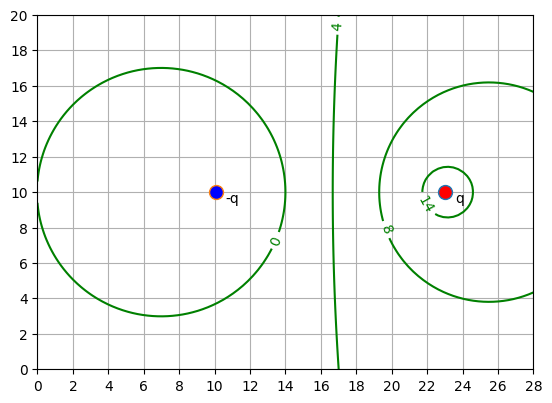

In [49]:
# The values for C=-0.23 and C0=0.02 are from the fit done later!
space.plot_potential(C=-0.23, C0=3.8, voltages=[0, 4, 8, 14])  # TODO: Add color map

<div dir=rtl> 

#### 4ג. קווים שווי פוטנציאל:

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> האם המדידות והגרף התיאורטי שלנו תואמים? איכותית? כמותית?
</div>

<div dir=rtl> 

### 5. מדידה כמותית של הפוטנציאל (לאורך ציר הסימטריה):

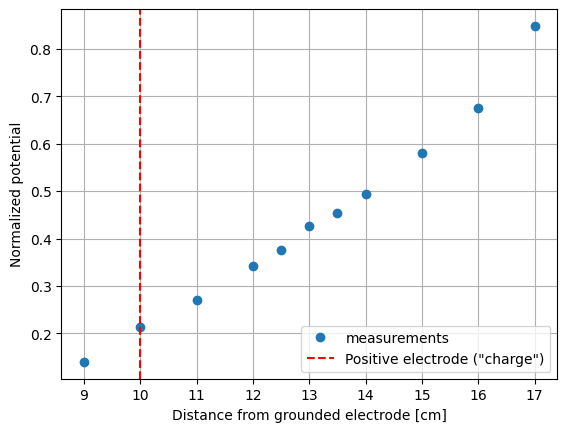

In [52]:
# Measuring the x-coordinate (left) and measured voltage (right) pairs:
measurements = np.array([
    [14, 2.8],
    [15, 4.28],
    [16, 5.43],
    [17, 6.83],
    [17.5, 7.53],
    [18, 8.53],
    [18.5, 9.08],
    [19, 9.89],
    [20, 11.61],
    [21, 13.5],
    [22, 16.96],
])
y, vdata = measurements.T  # apply .T to transpose and read the data by columns rather than rows
# Moving the measurements to be in relation to the grounded electrode (distance from negative electrode)
y -= 5

# Normalizing the measured voltage to be a unitless potential:
Vmax = 20
phi = vdata / Vmax

# Plotting:
plt.figure()
plt.plot(y, phi, 'o', label='measurements')
plt.grid()
plt.xlabel('Distance from grounded electrode [cm]')
plt.ylabel('Normalized potential')

# Adding a line indicating the location of the positive electrode ("charge"):
a = 10  #cm
plt.axvline(a, color='red', linestyle='--', label='Positive electrode ("charge")')

# Adding a legend to the figure:
plt.legend()

plt.show()

<div dir=rtl>

#### פוטנציאל לאורך ציר הסימטריה:


<div dir=rtl> 

#### 6. קווי שדה חשמלי:

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> האם קווי השדה החשמלי שלנו מאונכים לקווים שווי הפוטנציאל?
</div>

[חזרה לתחילת קונפיגורציה א'](#confA)

[חזרה לתחילת קונפיגורציה ב'](#confB)

[חזרה לתחילת מהלך הניסוי](#hathala)

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>